In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from solver_code import convection_diffusion_equation

In [2]:
# Initialise the class and set the fluid property constants
solver = convection_diffusion_equation(1.0, 0.5, 0.5, 100.0, 20.0)

Computation time: 4.315376281738281e-05 seconds for CDS.
Computation time: 2.7894973754882812e-05 seconds for UDS.
Computation time: 3.314018249511719e-05 seconds for PLDS.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


figures/phi_plot_grid_11_u_1_pe_0.10.eps is saved.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


figures/phi_plot_grid_11_u_1_pe_0.10.png is saved.
Computation time: 2.2172927856445312e-05 seconds for CDS.
Computation time: 2.002716064453125e-05 seconds for UDS.
Computation time: 2.6941299438476562e-05 seconds for PLDS.
figures/phi_plot_grid_11_u_5_pe_0.50.eps is saved.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


figures/phi_plot_grid_11_u_5_pe_0.50.png is saved.
Computation time: 2.09808349609375e-05 seconds for CDS.
Computation time: 1.9788742065429688e-05 seconds for UDS.
Computation time: 2.5987625122070312e-05 seconds for PLDS.
figures/phi_plot_grid_11_u_10_pe_1.00.eps is saved.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


figures/phi_plot_grid_11_u_10_pe_1.00.png is saved.
Computation time: 1.9788742065429688e-05 seconds for CDS.
Computation time: 2.002716064453125e-05 seconds for UDS.
Computation time: 2.6226043701171875e-05 seconds for PLDS.
figures/phi_plot_grid_11_u_15_pe_1.50.eps is saved.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


figures/phi_plot_grid_11_u_15_pe_1.50.png is saved.
Computation time: 2.002716064453125e-05 seconds for CDS.
Computation time: 2.0265579223632812e-05 seconds for UDS.
Computation time: 2.6226043701171875e-05 seconds for PLDS.
figures/phi_plot_grid_11_u_25_pe_2.50.eps is saved.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


figures/phi_plot_grid_11_u_25_pe_2.50.png is saved.
Computation time: 2.4080276489257812e-05 seconds for CDS.
Computation time: 2.09808349609375e-05 seconds for UDS.
Computation time: 2.5987625122070312e-05 seconds for PLDS.
figures/phi_plot_grid_11_u_50_pe_5.00.eps is saved.
figures/phi_plot_grid_11_u_50_pe_5.00.png is saved.


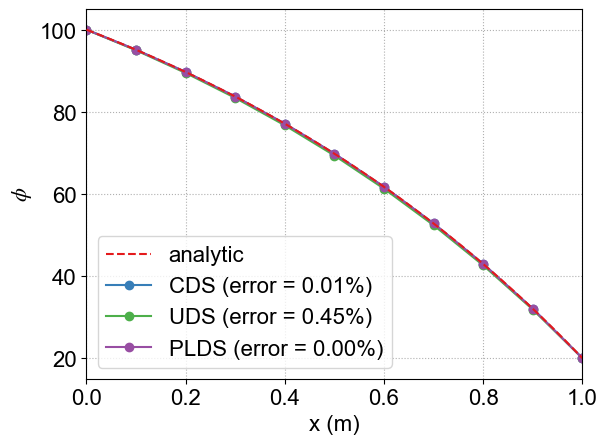

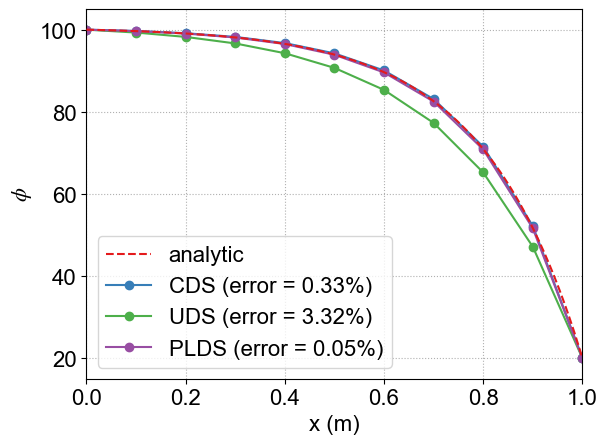

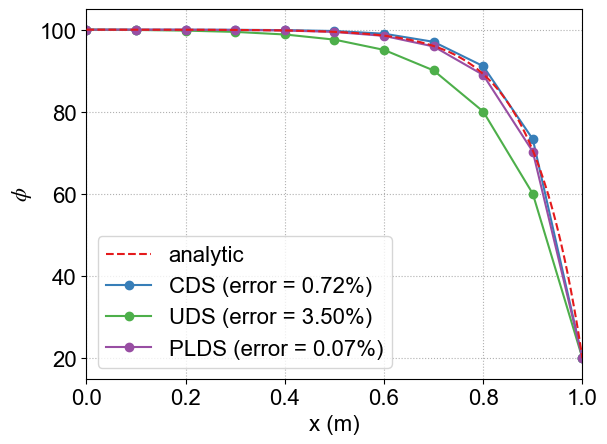

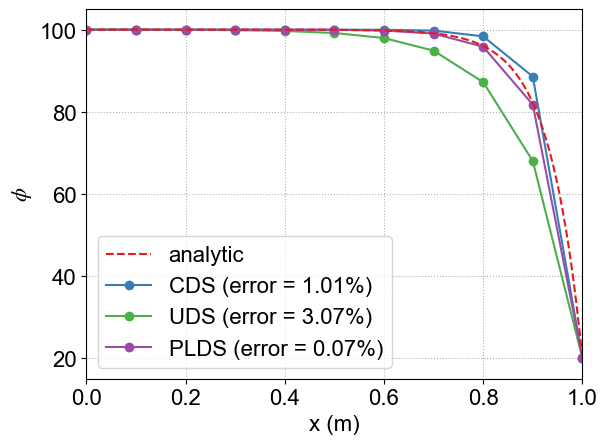

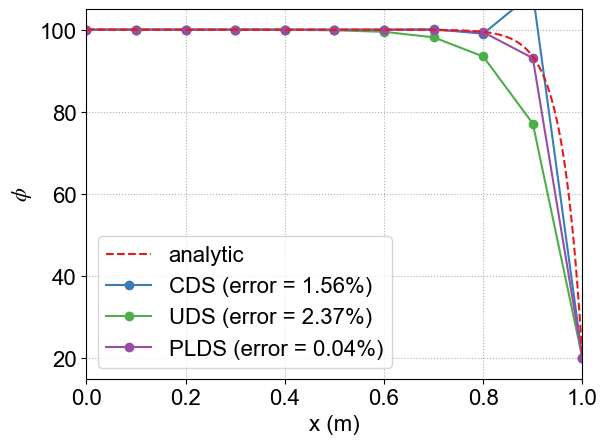

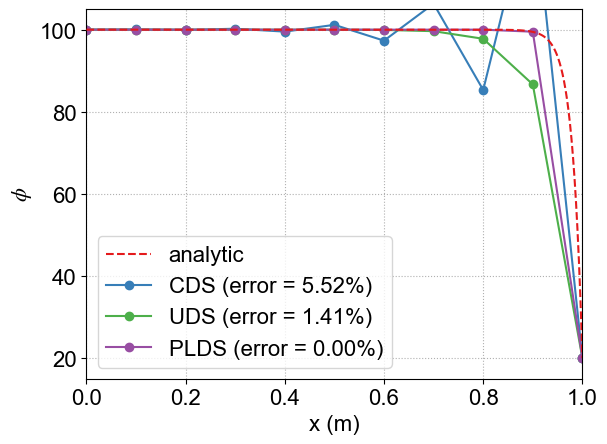

In [3]:
# plot the solutions under different u with 10 cells
for u in [1, 5, 10, 15, 25, 50]:
    solver.plot_the_result(number_of_grid = 11, u = u, scheme_list = ['CDS', 'UDS', 'PLDS'])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Computation time: 1.4781951904296875e-05 seconds for CDS.
Computation time: 1.2159347534179688e-05 seconds for UDS.
Computation time: 1.7881393432617188e-05 seconds for PLDS.
figures/phi_plot_grid_3_u_5_pe_2.50.eps is saved.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


figures/phi_plot_grid_3_u_5_pe_2.50.png is saved.
Computation time: 1.4066696166992188e-05 seconds for CDS.
Computation time: 1.1682510375976562e-05 seconds for UDS.
Computation time: 1.6927719116210938e-05 seconds for PLDS.
figures/phi_plot_grid_6_u_5_pe_1.00.eps is saved.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


figures/phi_plot_grid_6_u_5_pe_1.00.png is saved.
Computation time: 2.002716064453125e-05 seconds for CDS.
Computation time: 2.09808349609375e-05 seconds for UDS.
Computation time: 2.6226043701171875e-05 seconds for PLDS.
figures/phi_plot_grid_11_u_5_pe_0.50.eps is saved.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


figures/phi_plot_grid_11_u_5_pe_0.50.png is saved.
Computation time: 5.0067901611328125e-05 seconds for CDS.
Computation time: 4.315376281738281e-05 seconds for UDS.
Computation time: 6.103515625e-05 seconds for PLDS.
figures/phi_plot_grid_26_u_5_pe_0.20.eps is saved.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


figures/phi_plot_grid_26_u_5_pe_0.20.png is saved.
Computation time: 7.200241088867188e-05 seconds for CDS.
Computation time: 8.082389831542969e-05 seconds for UDS.
Computation time: 0.00011014938354492188 seconds for PLDS.
figures/phi_plot_grid_51_u_5_pe_0.10.eps is saved.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


figures/phi_plot_grid_51_u_5_pe_0.10.png is saved.
Computation time: 0.00014495849609375 seconds for CDS.
Computation time: 0.00015401840209960938 seconds for UDS.
Computation time: 0.00020885467529296875 seconds for PLDS.
figures/phi_plot_grid_101_u_5_pe_0.05.eps is saved.
figures/phi_plot_grid_101_u_5_pe_0.05.png is saved.


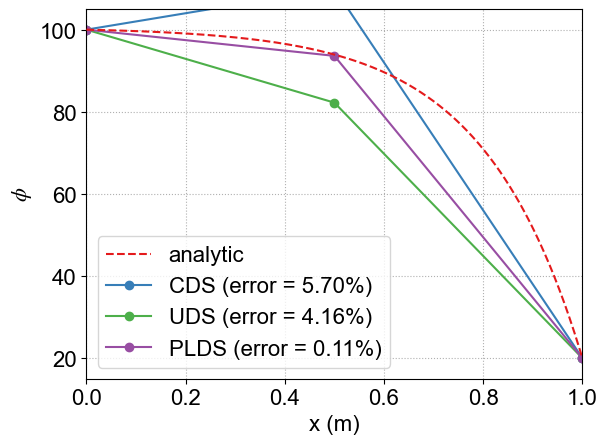

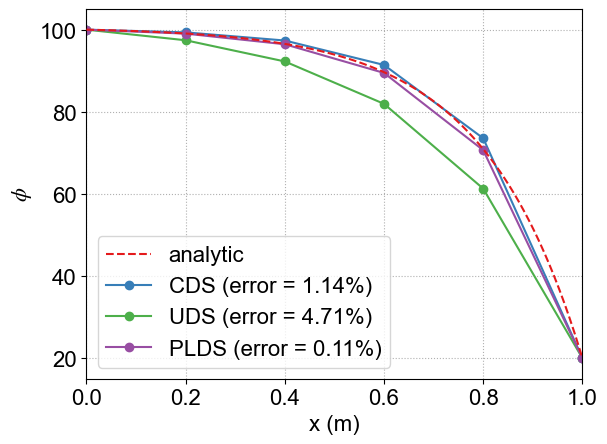

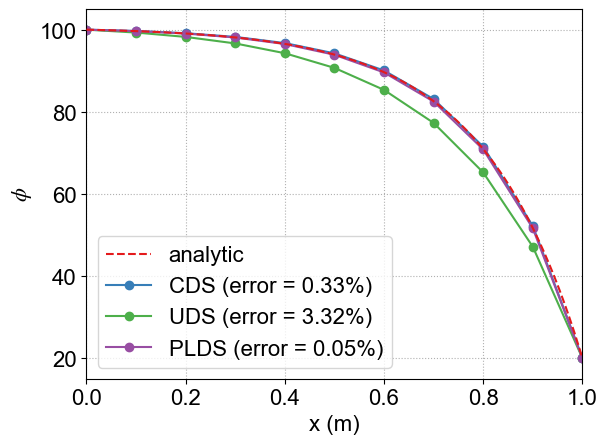

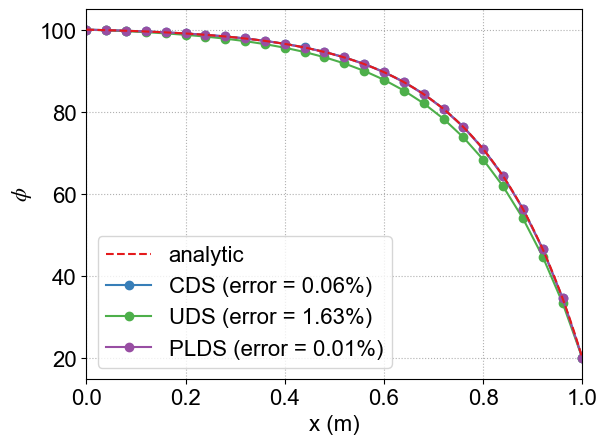

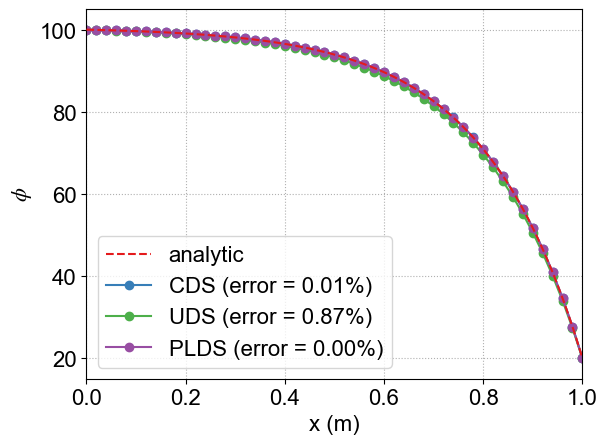

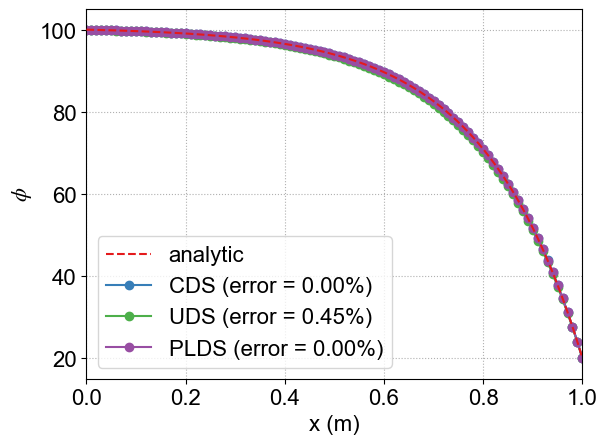

In [4]:
# plot the solutions under different grid sizes with u = 5
for number_of_grid in [3, 6, 11, 26, 51, 101]:
    solver.plot_the_result(number_of_grid = number_of_grid, u = 5, scheme_list = ['CDS', 'UDS', 'PLDS'])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Computation time: 0.0020401477813720703 seconds for CDS.
Computation time: 0.002277851104736328 seconds for UDS.
Computation time: 0.0028791427612304688 seconds for PLDS.
figures/phi_plot_grid_1001_u_5_pe_0.01.eps is saved.
figures/phi_plot_grid_1001_u_5_pe_0.01.png is saved.


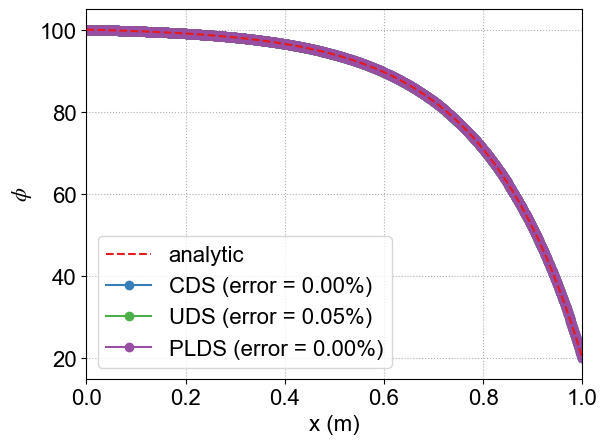

In [5]:
solver.plot_the_result(number_of_grid = 1001, u = 5, scheme_list = ['CDS', 'UDS', 'PLDS'])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


figures/flow_velocity_error_plot.eps is saved.
figures/flow_velocity_error_plot.png is saved.


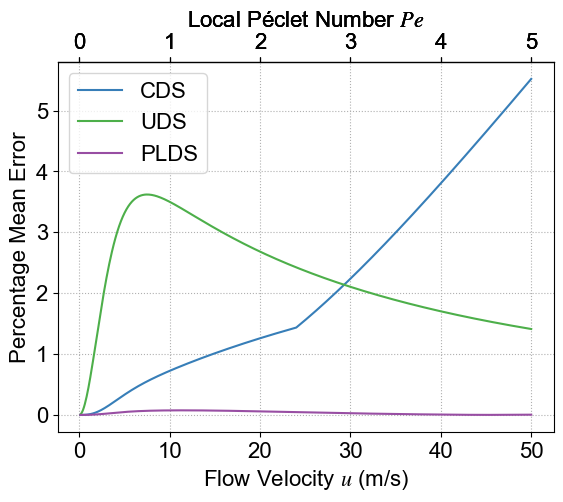

In [6]:
# plot the error at varying u
u_list = np.arange(0.1, 50.1, 0.1)
number_of_grid_list = [11]
scheme_list = ['CDS', 'UDS', 'PLDS']
solver.error_plot(u_list, number_of_grid_list, scheme_list, 'flow_velocity')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


figures/grid_size_error_plot.eps is saved.
figures/grid_size_error_plot.png is saved.


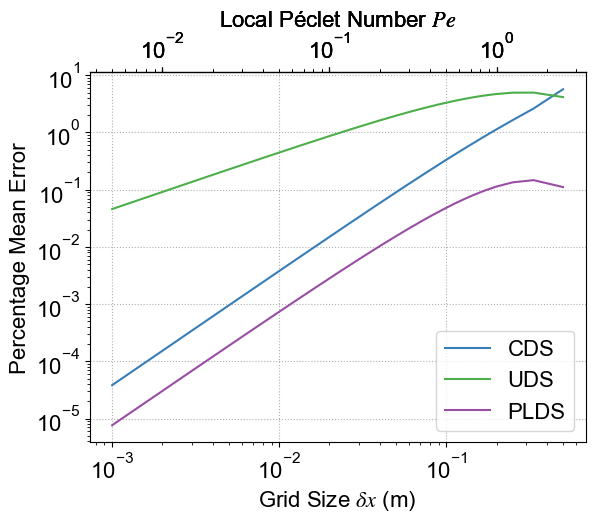

In [7]:
# plot the error at varying grid sizes
u_list = [5]
number_of_grid_list = np.arange(3, 1001, 1)
scheme_list = ['CDS', 'UDS', 'PLDS']
solver.error_plot(u_list, number_of_grid_list, scheme_list, 'grid_size')